# Audio Feature Summary for All Chord Progressions

This code generates plots of mean values (with error bars) of various (numeric) audio features for each chord progression.

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

# load data

has_audio_data_pruned = pd.read_csv('three_four_five_has_audio_pruned.csv')

cp_group_sizes = has_audio_data_pruned.groupby('cp').size()
cp_group_sizes.name='n'
cp_group_sizes = cp_group_sizes.reset_index()


has_audio_data_pruned = has_audio_data_pruned.merge(cp_group_sizes, on='cp')

# We only look at chord progressions associated to at least five artist/song/section combinations
has_5_obs = has_audio_data_pruned[has_audio_data_pruned.n>=5]

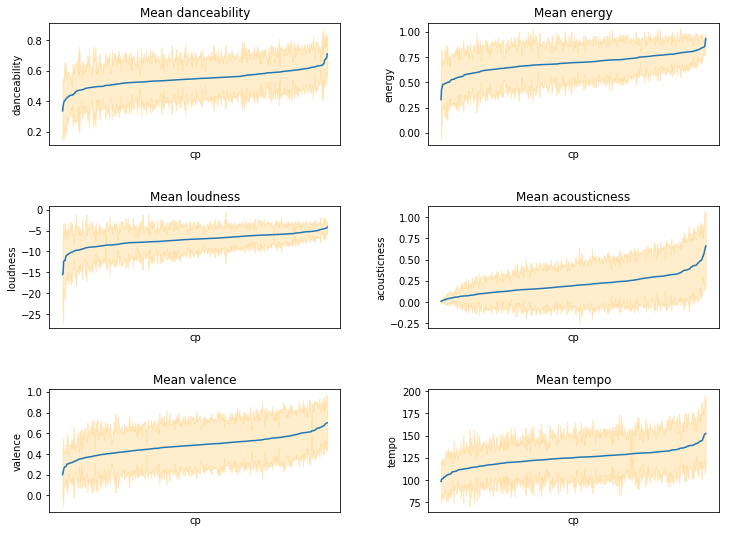

In [4]:
# Now define the plotting function and call it.
numeric_audio_features = ['danceability', 'energy', 'loudness', 
                           'acousticness', 'valence', 'tempo']

def all_cp_plot(data, features):
    
    num_plots = len(features)
    cols = int(np.ceil(num_plots/3))
    fig = plt.figure(figsize=(6*cols,9))
    fig.subplots_adjust(hspace=.5, wspace=.3)
    
    for i, feature in enumerate(features):
        ax = fig.add_subplot(3, cols, i+1)
        cp_feature_groups = data.groupby('cp')[feature].agg([np.mean, np.std])
        feature_sorted = cp_feature_groups.sort_values(by='mean')
        feature_sorted['mean'].plot(ax=ax)
        plt.fill_between(feature_sorted.index, 
                         feature_sorted['mean']-feature_sorted['std'],
                         feature_sorted['mean'] + feature_sorted['std'], 
                         color='orange', alpha=0.2)
        plt.xticks([],[])
        plt.ylabel(feature)
        ax.set_title('Mean {}'.format(feature))
    plt.show()

all_cp_plot(has_5_obs, numeric_audio_features)